# **Instance Colorization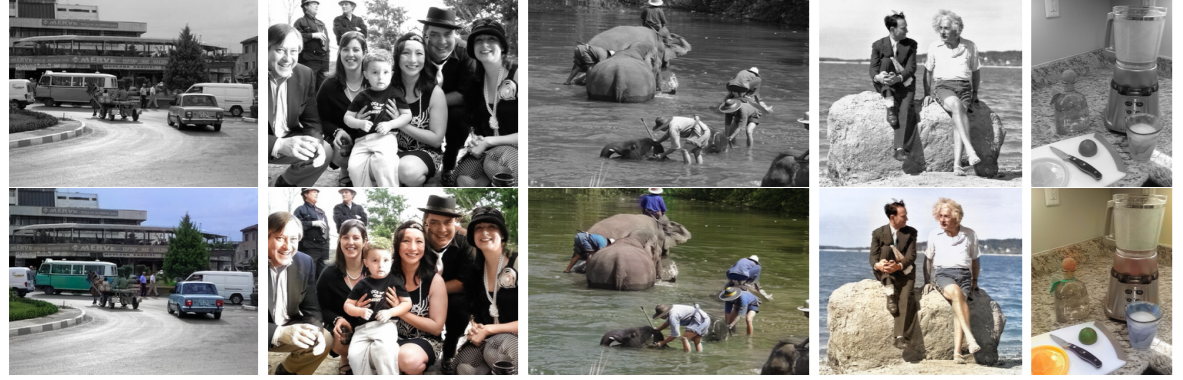**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install dominate==2.4.0
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
!pip install visdom

In [ ]:
cd drive/

In [ ]:
cd MyDrive/InstColorization

In [ ]:
!git clone https://github.com/ericsujw/InstColorization.git

In [ ]:
!sh scripts/download_model.sh

## **Note: In the dir Instance Colorization create a dir " train_dataset/train" and put your dataset ,the dataset is color images**


# ***Now Run the Code ***

In [ ]:
!python inference_bbox.py --test_img_dir ./train_dataset/train --filter_no_obj


## **First Module Instance Colorization**

In [ ]:
mkdir ./checkpoints/coco_full
cp ./checkpoints/siggraph_retrained/latest_net_G.pth ./checkpoints/coco_full/

In [ ]:
python train.py --stage full --name coco_full --sample_p 1.0 --niter 100 --niter_decay 50 --load_model --lr 0.0005 --model train --fineSize 256 --batch_size 16 --display_ncols 3 --display_freq 1600 --print_freq 1600 --train_img_dir ./train_dataset/train

## **Second Module Instance Colorization**

In [ ]:
mkdir ./checkpoints/coco_instance
cp ./checkpoints/coco_full/latest_net_G.pth ./checkpoints/coco_instance/

In [ ]:
!python train.py --stage instance --name coco_instance --sample_p 1.0 --niter 30 --niter_decay 50 --load_model --lr 0.0005 --model train --fineSize 256 --batch_size 8 --display_ncols 3 --display_freq 1600 --print_freq 1600 --train_img_dir ./train_dataset/train

## **Third Module InstanceColorization**

In [ ]:
mkdir ./checkpoints/coco_mask

In [ ]:
cp ./checkpoints/coco_full/latest_net_G.pth ./checkpoints/coco_mask/latest_net_GF.pth    

In [ ]:
cp ./checkpoints/coco_instance/latest_net_G.pth ./checkpoints/coco_mask/latest_net_G.pth

In [ ]:
cp ./checkpoints/coco_full/latest_net_G.pth ./checkpoints/coco_mask/latest_net_GComp.pth

In [ ]:
python train.py --stage fusion --name coco_mask --sample_p 1.0 --niter 10 --niter_decay 20 --lr 0.00005 --model train --load_model --display_ncols 4 --fineSize 256 --batch_size 1 --display_freq 500 --print_freq 500 --train_img_dir ./train_dataset/train

## **Note: In the dir Instance Colorization create a dir " train_dataset/test" and put your dataset ,the dataset is color images**

## **Test Instance Colorization**

In [ ]:
!python inference_bbox.py --test_img_dir ./train_dataset/test


In [ ]:
!python test_fusion.py --name test_fusion --sample_p 1.0 --model fusion --fineSize 256 --test_img_dir ./train_dataset/test --results_img_dir results